In [1]:
from hamilton import driver
from world_machine_experiments import shared
from world_machine_experiments.toy1d import base


In [2]:
d = driver.Builder().with_modules(base, shared).build()


In [3]:
final_vars = ["toy1d_train_history",
                          "save_toy1d_model",
                          "save_toy1d_train_history",
                          "save_toy1d_train_plots",
                          "save_toy1d_prediction_plots",
                          "toy1d_datasets"]

In [10]:

from torch.optim import  AdamW
from world_machine_experiments.toy1d import Dimensions

from world_machine.train.scheduler import UniformScheduler
from world_machine.train.stages import StateSaveMethod


toy1d_base_args = {"sequence_length": 1000,
                       "n_sequence": 10000,
                       "context_size": 200,
                       "batch_size": 32,
                       "n_epoch": 10,
                       "learning_rate": 5e-4,
                       "weight_decay": 5e-5,
                       "accumulation_steps": 1,
                       "state_dimensions": [0],
                       "optimizer_class": AdamW,
                       "block_configuration": [Dimensions.MEASUREMENT, Dimensions.STATE_INPUT],
                       "device": "gpu",
                       "state_control": "periodic",
                       "state_activation": "tanh",
                       "discover_state": True,
                       "sensorial_train_losses": [Dimensions.MEASUREMENT],
                       "state_size": 128,
                       "positional_encoder_type": "alibi",
                       "n_attention_head": 4,
                       "n_segment": 1,
                       "fast_forward": False,
                       "stable_state_epochs": 1,
                       "check_input_masks": True,
                       "state_save_method": StateSaveMethod.REPLACE,
                       "mask_sensorial_data": UniformScheduler(0, 1, 100),
                       "short_time_recall": {
                           Dimensions.MEASUREMENT
                       },
                       "recall_stride_past": 3,
                       "recall_stride_future": 3,
                       "recall_n_past": 5,
                       "recall_n_future": 5,
                       "train_mse": True,
                       "train_sdtw": False,
                       "noise_config": {
                           "state": {
                               "mean": 0.0,
                               "std": 0.1
                           },
                           "measurement": {
                               "mean": 0.0,
                               "std": 0.1
                           }
                       },
                       "output_dir":".",
                       "seed":[1,2]
                       }


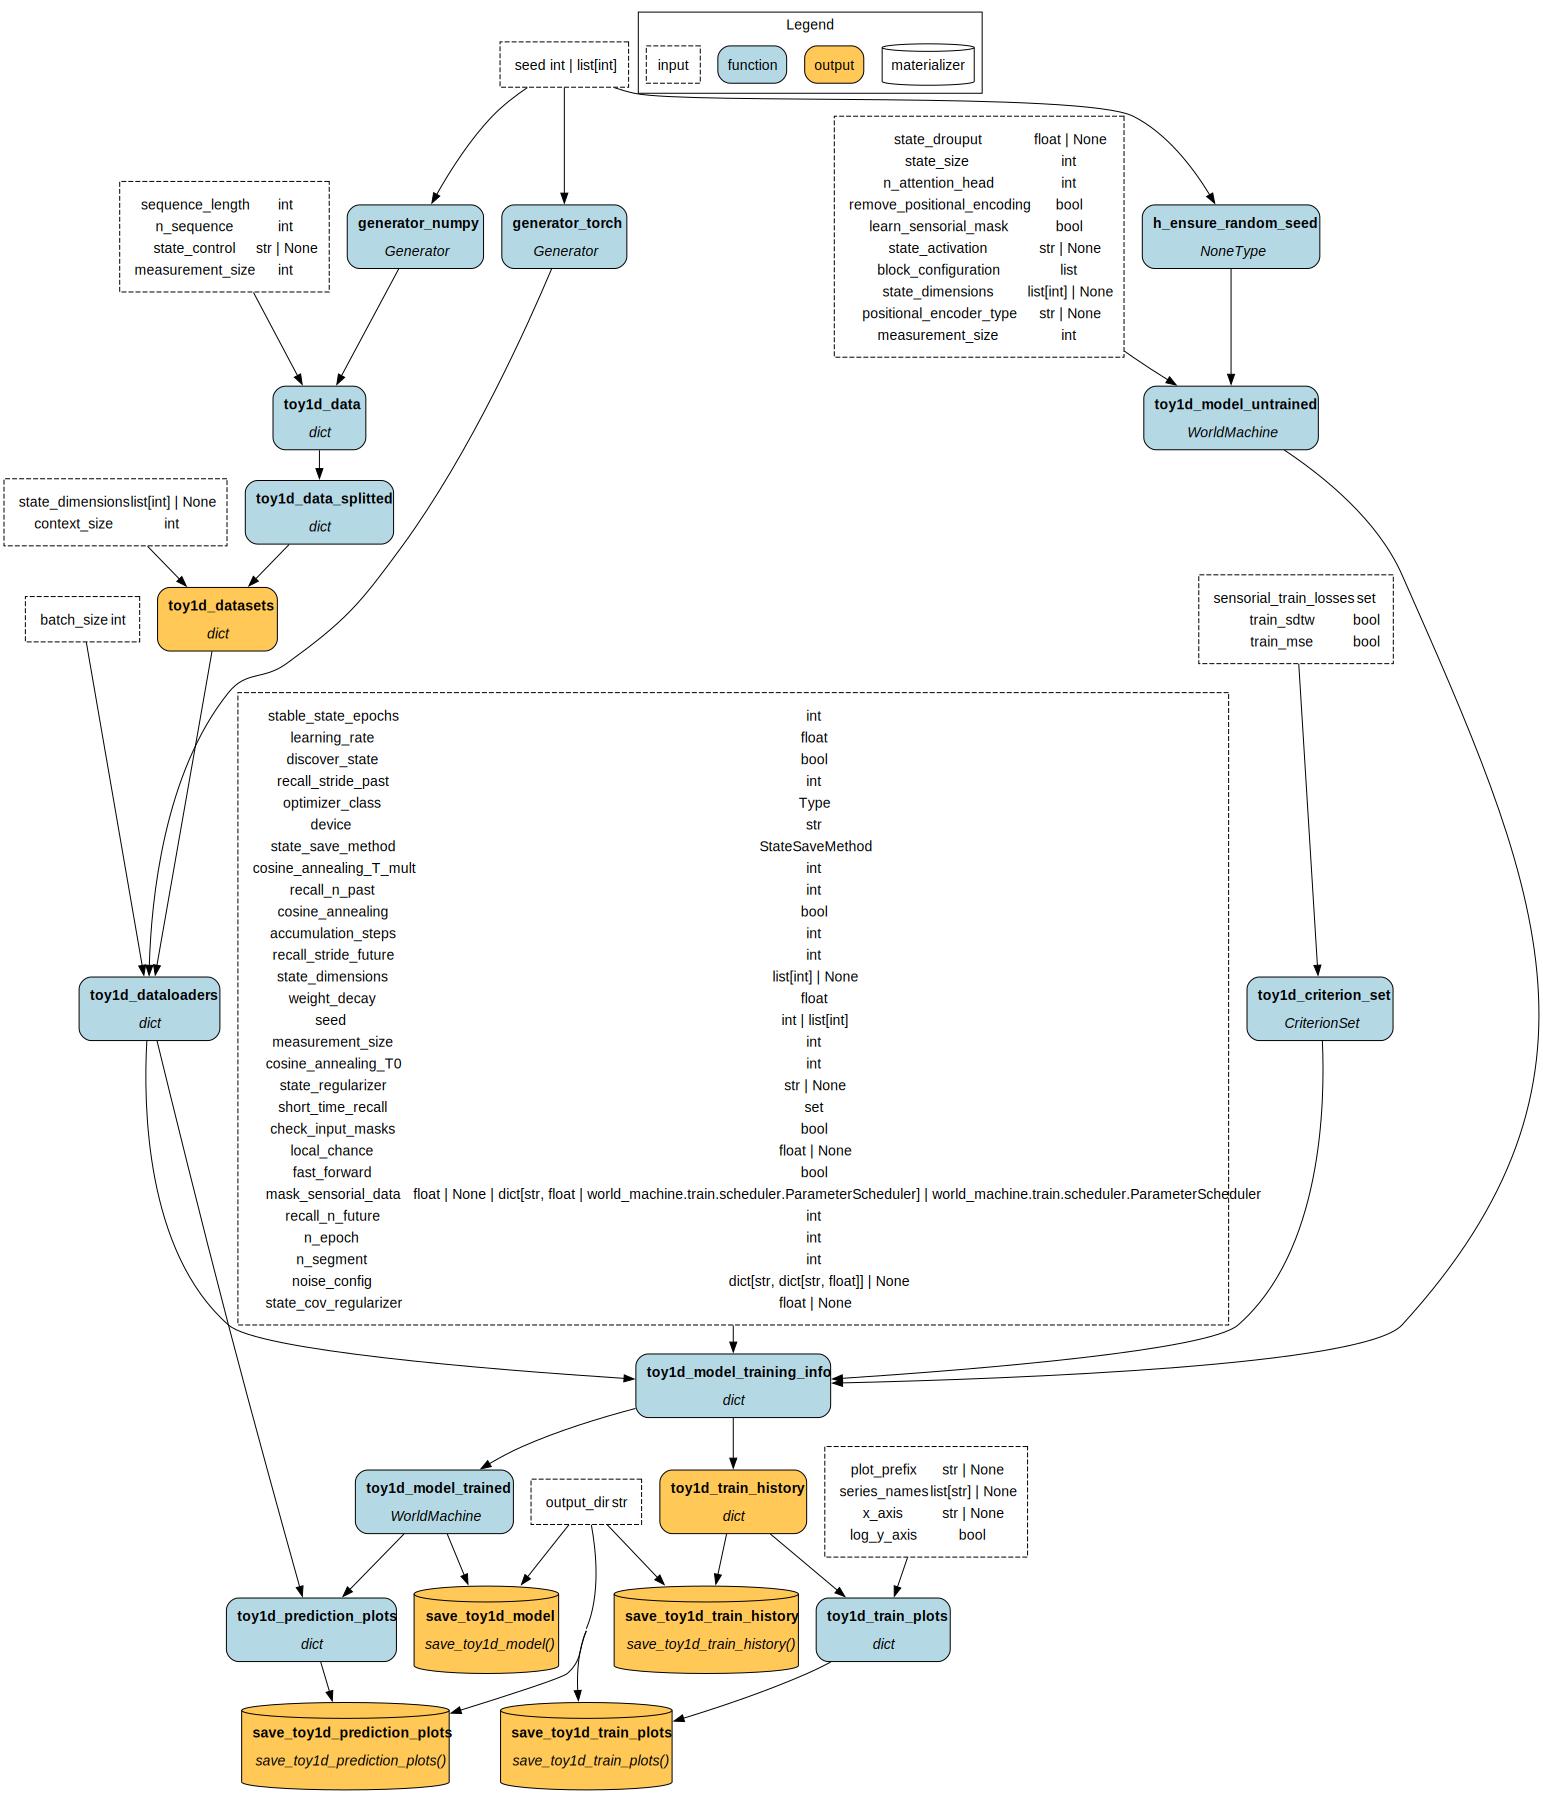

In [104]:
d.visualize_execution(final_vars=final_vars,
                      orient="TB",
                      deduplicate_inputs=True,
                      output_file_path="aa.dot",
                      bypass_validation=True)

In [24]:
import pydot

In [ ]:
graphs  = pydot.graph_from_dot_file("aa.dot")
graph = graphs[0]

nodes : list[pydot.Node]= graph.get_node_list()
labels : list[str] = []
for node in nodes:
    name : str = node.get_name()
    if name.startswith("_") and name.endswith("_inputs"):
        
        label = node.get_label()

        labels.append(label)
        rows = label.split("</tr>")
        
        for i, row in enumerate(rows):
            columns = row.split("<td>")

            if len(columns) > 2:
                columns = columns[:2]
                rows[i] = "<td>".join(columns)

        label = "</tr>".join(rows)

        node.set_label(label)
        node.set_width("")
        

In [100]:
type(graph)

pydot.core.Dot

In [101]:
type(node)

pydot.core.Node

In [102]:
print(graph.to_string())

digraph G {
graph [bb="0,0,1482.8,1500.3", compound=true, concentrate=true, rankdir=TB, ranksep="0.4", style=filled];
node [fillcolor="#ffffff", label="\N"];
subgraph cluster__legend {
graph [bb="1130.8,1411,1474.8,1492.3", fillcolor="#ffffff", fontname=helvetica, label=Legend, lheight="0.22", lp="1302.8,1480.4", lwidth="0.62", rank=same];
input [fontname=Helvetica, height="0.51875", margin="0.15", pos="1165.8,1439.8", shape=rectangle, style="filled,dashed", width="0.75"];
function [fillcolor="#b4d8e4", fontname=Helvetica, height="0.51875", margin="0.15", pos="1244.8,1439.8", shape=rectangle, style="rounded,filled", width="0.95625"];
output [fillcolor="#FFC857", fontname=Helvetica, height="0.51875", margin="0.15", pos="1326.8,1439.8", shape=rectangle, style="rounded,filled", width="0.82083"];
materializer [fontname=Helvetica, height="0.57578", margin="0.15,0.1", pos="1420.8,1439.8", shape=cylinder, style=filled, width="1.2792"];
}

toy1d_criterion_set [fillcolor="#b4d8e4", fontname=Hel

In [99]:
graph.write_svg("aa.svg")

In [103]:
graph.write_dot("aa.dot")

In [89]:
label = labels[3]
rows = label.split("</tr>")

for i, row in enumerate(rows):
    columns = row.split("<td>")

    if len(columns) > 2:
        columns = columns[:2]
        rows[i] = "<td>".join(columns)

label = "</tr>".join(rows)
label

'<<table border="0"><tr><td>seed</td></tr></table>>'

In [ ]:
'<<table border="0"><tr><td>seed</td></tr></table>>'

In [71]:
label

'<<table border="0"><tr><td>sensorial_train_losses</td><tr><tr><td>train_sdtw</td><tr><tr><td>train_mse</td><tr></table>>'

In [46]:
from html_to_markdown import convert


In [50]:
html = r'''convert("<<table border="0"><tr><td>stable_state_epochs</td><td>int</td></tr><tr><td>learning_rate</td><td>float</td></tr><tr><td>discover_state</td><td>bool</td></tr><tr><td>recall_stride_past</td><td>int</td></tr><tr><td>optimizer_class</td><td>Type</td></tr><tr><td>device</td><td>str</td></tr><tr><td>state_save_method</td><td>StateSaveMethod</td></tr><tr><td>recall_n_past</td><td>int</td></tr><tr><td>accumulation_steps</td><td>int</td></tr><tr><td>recall_stride_future</td><td>int</td></tr><tr><td>state_dimensions</td><td>list[int] | None</td></tr><tr><td>weight_decay</td><td>float</td></tr><tr><td>seed</td><td>int | list[int]</td></tr><tr><td>check_input_masks</td><td>bool</td></tr><tr><td>fast_forward</td><td>bool</td></tr><tr><td>mask_sensorial_data</td><td>float | None | dict[str, float | world_machine.train.scheduler.ParameterScheduler] | world_machine.train.scheduler.ParameterScheduler</td></tr><tr><td>recall_n_future</td><td>int</td></tr><tr><td>n_epoch</td><td>int</td></tr><tr><td>n_segment</td><td>int</td></tr><tr><td>noise_config</td><td>dict[str, dict[str, float]] | None</td></tr><tr><td>short_time_recall</td><td>set</td></tr></table>>")'''

In [53]:
print(str(convert(html)))

convert("<

| stable_state_epochs | int |
| --- | --- |
| learning_rate | float |
| discover_state | bool |
| recall_stride_past | int |
| optimizer_class | Type |
| device | str |
| state_save_method | StateSaveMethod |
| recall_n_past | int |
| accumulation_steps | int |
| recall_stride_future | int |
| state_dimensions | list[int] | None |
| weight_decay | float |
| seed | int | list[int] |
| check_input_masks | bool |
| fast_forward | bool |
| mask_sensorial_data | float | None | dict[str, float | world_machine.train.scheduler.ParameterScheduler] | world_machine.train.scheduler.ParameterScheduler |
| recall_n_future | int |
| n_epoch | int |
| n_segment | int |
| noise_config | dict[str, dict[str, float]] | None |
| short_time_recall | set |
>")

